In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, select, desc

In [4]:
# create engine to hawaii.sqlite
db_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{db_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set.
max_dt = session.query(func.max(Measurement.date)).scalar()
max_dt

'2017-08-23'

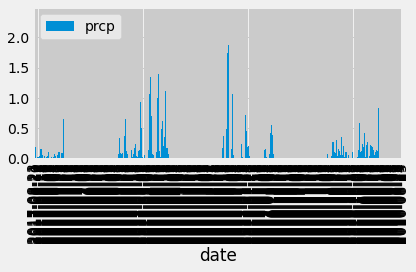

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

precip = [Measurement.date,
          func.avg(Measurement.prcp)]

last_year = session.query(*precip).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= "2016-08-23").\
    order_by(desc(Measurement.date)).\
    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(last_year, columns=['date', 'prcp'])
precip_df.set_index('date', inplace=True)

# Sort the dataframe by date
precip_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot.bar()
plt.tight_layout()
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean_precip = precip_df['prcp'].mean()
median_precip = precip_df['prcp'].median()
var_precip = precip_df['prcp'].var()
std_precip = precip_df['prcp'].std()
sem_precip = precip_df['prcp'].sem()

stats_precip = pd.DataFrame({"Mean_precipitation":mean_precip,
                             "Median_precipitation":median_precip,
                             "Variance_precipitation":var_precip,
                             "STD_precipitation":std_precip,
                             "SEM_precipitation":sem_precip}, index=[0])
stats_precip

,Mean_precipitation,Median_precipitation,Variance_precipitation,STD_precipitation,SEM_precipitation
0,0.170757,0.07,0.087429,0.295683,0.015456


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
session.close()